<a href="https://colab.research.google.com/github/arpithagurumurthy/CMPE260_Reinforcement_Learning/blob/main/ColabNotebooks_StableBaselines/PPO2_StableBaselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Experimenting with Stable baselines PPO2**

Trying out PPO algorithm from stable baselines library on our datasets to check for performance

The envirnment used is gym-anytrading: https://github.com/AminHP/gym-anytrading 

In [ ]:
##Installations required
!pip install tensorflow-gpu==1.15.0
!pip install tensorflow==1.15.0
!pip install stable-baselines
!pip install gym-anytrading gym

In [ ]:
##For algorithms
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2
##Data preprocessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
##Environments
import gym
import gym_anytrading
##Neural net
from stable_baselines.common.policies import MlpPolicy

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [ ]:
from io import BytesIO
import requests
import pandas as pd
# r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vTnBftYIRzv-xeASzgtYohGYcdxGh6jwpARad1fMtH26E9AaxiYEJM74rYkKhgav_zprQ7wXvDPgJg1/pub?gid=388090467&single=true&output=csv')
# data = r.content
# dj_df = pd.read_csv(BytesIO(data))

In [ ]:
nasdaq_df = pd.read_csv('/content/NasdaqComposite_2020-2021.csv')

In [ ]:
nasdaq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,12285.750000,12360.059570,12217.349609,12349.370117,12349.370117,5150820000
1,2020-12-03,12369.259766,12439.019531,12356.990234,12377.179688,12377.179688,5182100000
2,2020-12-04,12399.320313,12464.230469,12376.440430,12464.230469,12464.230469,5044210000
3,2020-12-07,12461.000000,12536.230469,12460.549805,12519.950195,12519.950195,4741690000
4,2020-12-08,12503.169922,12594.540039,12453.209961,12582.769531,12582.769531,4758170000


### **Converting datadate column to date type as required by gym_anytrading**

In [ ]:
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'])
nasdaq_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
nasdaq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,12285.750000,12360.059570,12217.349609,12349.370117,12349.370117,5150820000
1,2020-12-03,12369.259766,12439.019531,12356.990234,12377.179688,12377.179688,5182100000
2,2020-12-04,12399.320313,12464.230469,12376.440430,12464.230469,12464.230469,5044210000
3,2020-12-07,12461.000000,12536.230469,12460.549805,12519.950195,12519.950195,4741690000
4,2020-12-08,12503.169922,12594.540039,12453.209961,12582.769531,12582.769531,4758170000


In [ ]:
nasdaq_df.set_index('Date', inplace=True)
nasdaq_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-02,12285.750000,12360.059570,12217.349609,12349.370117,12349.370117,5150820000
2020-12-03,12369.259766,12439.019531,12356.990234,12377.179688,12377.179688,5182100000
2020-12-04,12399.320313,12464.230469,12376.440430,12464.230469,12464.230469,5044210000
2020-12-07,12461.000000,12536.230469,12460.549805,12519.950195,12519.950195,4741690000
2020-12-08,12503.169922,12594.540039,12453.209961,12582.769531,12582.769531,4758170000


## **Build Environment**

In [ ]:
env = gym.make('stocks-v0', df=nasdaq_df, frame_bound=(5,100), window_size=5)

In [ ]:
env.signal_features

array([[ 1.23493701e+04,  0.00000000e+00],
       [ 1.23771797e+04,  2.78095710e+01],
       [ 1.24642305e+04,  8.70507810e+01],
       [ 1.25199502e+04,  5.57197260e+01],
       [ 1.25827695e+04,  6.28193360e+01],
       [ 1.23389502e+04, -2.43819336e+02],
       [ 1.24058096e+04,  6.68593750e+01],
       [ 1.23778701e+04, -2.79394530e+01],
       [ 1.24400400e+04,  6.21699220e+01],
       [ 1.25950596e+04,  1.55019531e+02],
       [ 1.26581904e+04,  6.31308600e+01],
       [ 1.27647500e+04,  1.06559570e+02],
       [ 1.27556396e+04, -9.11035200e+00],
       [ 1.27425195e+04, -1.31201170e+01],
       [ 1.28079199e+04,  6.54003910e+01],
       [ 1.27711104e+04, -3.68095700e+01],
       [ 1.28047305e+04,  3.36201170e+01],
       [ 1.28994199e+04,  9.46894530e+01],
       [ 1.28502197e+04, -4.92001950e+01],
       [ 1.28700000e+04,  1.97802730e+01],
       [ 1.28882803e+04,  1.82802730e+01],
       [ 1.26984502e+04, -1.89830078e+02],
       [ 1.28189600e+04,  1.20509766e+02],
       [ 1.

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 541.7734370000035, 'total_profit': 0.7290449389076591, 'position': 1}


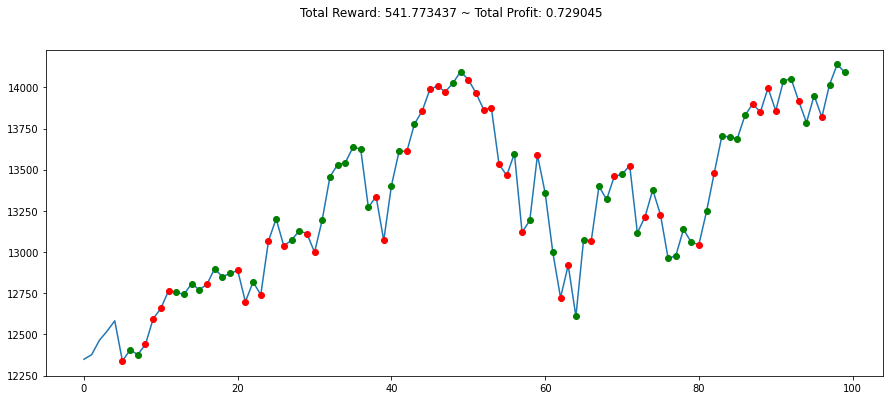

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## **Build Environment and Train**

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=nasdaq_df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

Using the MLP as the underlying neural network

In [ ]:
model = PPO2('MlpPolicy', env, verbose=1) 
# PPO2('MlpPolicy', env_train, ent_coef = 0.005, nminibatches = 8)
model.learn(total_timesteps=25000)

Wrapping the env in a DummyVecEnv.
--------------------------------------
| approxkl           | 0.0002904851  |
| clipfrac           | 0.0           |
| explained_variance | -0.000124     |
| fps                | 394           |
| n_updates          | 1             |
| policy_entropy     | 0.6929229     |
| policy_loss        | -0.0007029228 |
| serial_timesteps   | 128           |
| time_elapsed       | 1.55e-05      |
| total_timesteps    | 128           |
| value_loss         | 16118.893     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00027453812  |
| clipfrac           | 0.0            |
| explained_variance | 8.88e-06       |
| fps                | 1040           |
| n_updates          | 2              |
| policy_entropy     | 0.6908757      |
| policy_loss        | -0.00053796533 |
| serial_timesteps   | 256            |
| time_elapsed       | 0.331          |
| total_timesteps    | 256            |
| value_loss      

## **Evaluation on apple_df**

In [ ]:
apple_df = pd.read_csv('/content/AAPL_2020-2021.csv')

In [ ]:
env = gym.make('stocks-v0', df=apple_df, frame_bound=(10,30), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 7.009993999999992, 'total_profit': 0.9930472821294013, 'position': 0}


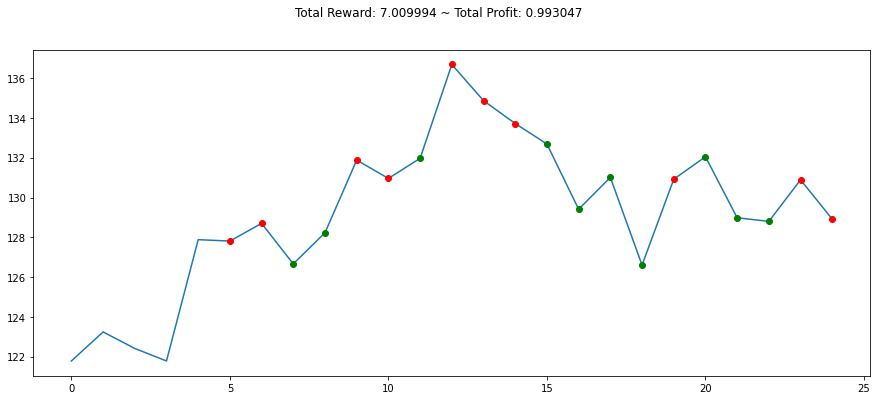

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## **Reference**
https://github.com/nicknochnack/Reinforcement-Learning-for-Trading/blob/main/Reinforcement%20Learning%20GME%20Trading%20Tutorial.ipynb